In [139]:
import pandas as pd
import seaborn as sns
import math

In [140]:
df = pd.read_csv("data\Rport120BeforeCovid.csv")
df['Data'] = df['Data'].astype('datetime64[ns]')

In [141]:
df.describe()

,Equal Weights,HRP,MV
count,122.000000,122.000000,122.000000
mean,1.159124,1.039577,0.927776
std,6.882758,5.274228,4.102239
min,-14.463881,-11.280570,-10.534921
25%,-2.432378,-1.919760,-1.530646
50%,0.222918,0.319084,0.660428
75%,4.562751,4.575961,4.167851
max,28.407488,17.969638,11.767025


In [142]:
df

,Data,Equal Weights,HRP,MV
0,2010-01-01,-2.547480,-2.551249,-1.398537
1,2010-02-01,0.033475,0.021188,-0.599230
2,2010-03-01,4.546539,2.392432,-0.531021
3,2010-04-01,-2.565052,-1.485060,1.602359
4,2010-05-01,-5.656136,-4.083659,-3.093820
...,...,...,...,...
117,2019-10-01,1.166583,-0.915470,-2.747561
118,2019-11-01,3.864995,3.873896,4.238792
119,2019-12-01,9.531770,8.693040,8.460266
120,2020-01-01,-0.990657,-0.072068,-0.053068


# Accumulated return

In [143]:
display(df['Equal Weights'].sum())
display(df['HRP'].sum())
display(df['MV'].sum())

141.4131749634447

126.82836445010918

113.18865358506542

In [144]:
sns.set(rc = {'figure.figsize':(30,8)})

# Returns by portfolio over the time

<AxesSubplot: xlabel='Data', ylabel='value'>

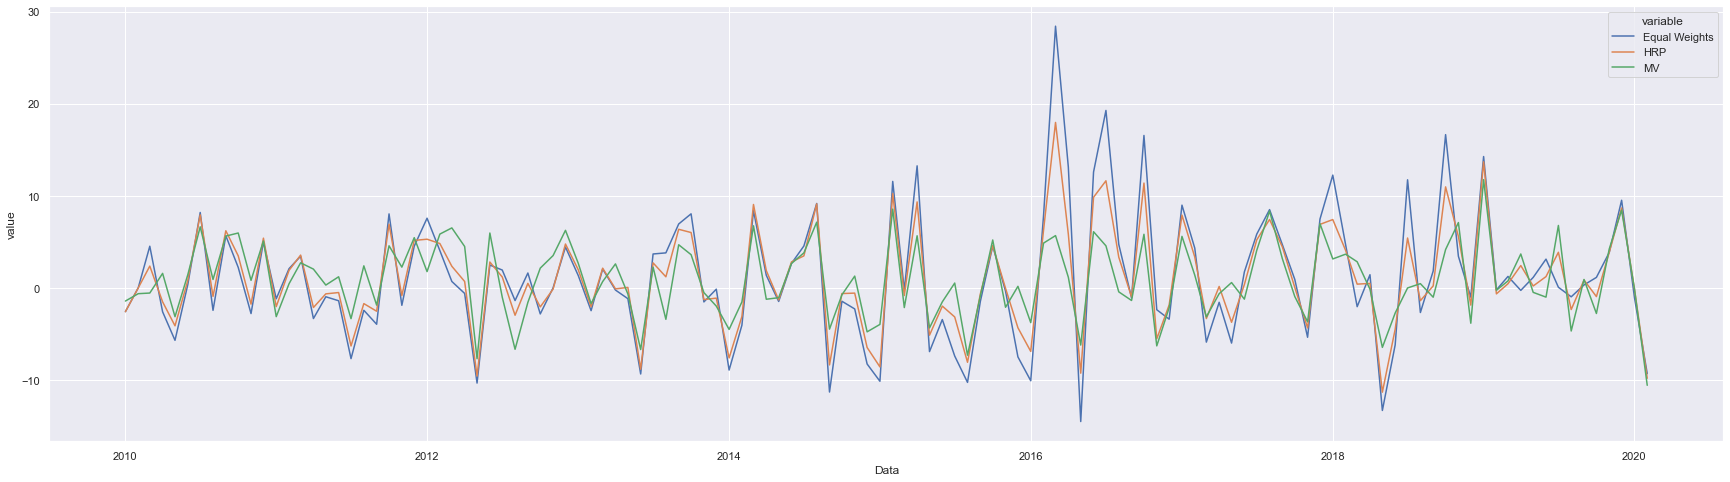

In [145]:
sns.lineplot(x='Data', y='value', hue='variable', 
             data=pd.melt(df, ['Data']))

### Pandemic Window

In [146]:
# pandemic_df = df.loc[(df['Data'] >= '2020-03-01') & (df['Data'] < '2020-04-15')]
# sns.lineplot(x='Data', y='value', hue='variable', 
#              data=pd.melt(pandemic_df, ['Data']))


# Converting data to datetime

In [147]:
df['Ano'] = df['Data'].astype('datetime64[ns]')
df['Ano'] = df['Data'].dt.year.astype(int)

In [148]:
df_mean_by_year = df.groupby(['Ano'], as_index=False).mean()
df_median_by_year = df.groupby(['Ano'], as_index=False).median()
df_std_by_year = df.groupby(['Ano'], as_index=False).std()

# AV

In [149]:
def annualized_average_return(df, col):
  avg_return = df[col].mean()
  annualized_avg_return = 12 * avg_return

  return annualized_avg_return


In [150]:
av_df = pd.DataFrame(columns=['Portfolio', 'Annualized Average Return'])
columns = ['Equal Weights', 'HRP', 'MV']
for col in columns:
    avg_return = annualized_average_return(df, col)
    row = {'Portfolio': col, 'Annualized Average Return': avg_return}
    av_df = av_df.append(row, ignore_index=True)

av_df


C:\Users\felip\AppData\Local\Temp\ipykernel_13004\1689314024.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  av_df = av_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_13004\1689314024.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  av_df = av_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_13004\1689314024.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  av_df = av_df.append(row, ignore_index=True)


,Portfolio,Annualized Average Return
0,Equal Weights,13.909493
1,HRP,12.474921
2,MV,11.133310


<AxesSubplot: xlabel='Ano', ylabel='value'>

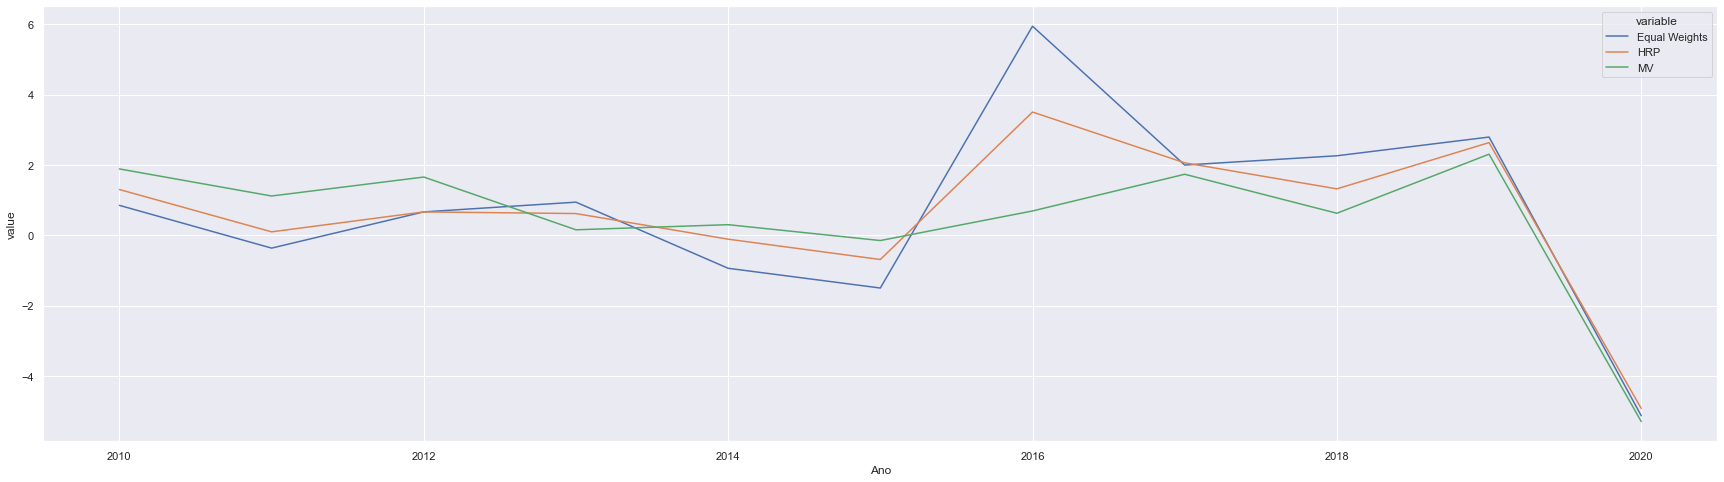

In [151]:
sns.lineplot(x='Ano', y='value', hue='variable', 
             data=pd.melt(df_mean_by_year, ['Ano']))


# SD

In [152]:
def annualized_standard_deviation(df, col):
  std = df[col].std()
  annualized_std = math.sqrt(12) * std

  return annualized_std


In [153]:
sd_df = pd.DataFrame(columns=['Portfolio', 'Annualized Standard Deviation'])

for col in columns:
    std = annualized_standard_deviation(df, col)
    row = {'Portfolio': col, 'Annualized Standard Deviation': std}
    sd_df = sd_df.append(row, ignore_index=True)

sd_df


C:\Users\felip\AppData\Local\Temp\ipykernel_13004\2712018244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sd_df = sd_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_13004\2712018244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sd_df = sd_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_13004\2712018244.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sd_df = sd_df.append(row, ignore_index=True)


,Portfolio,Annualized Standard Deviation
0,Equal Weights,23.842573
1,HRP,18.270463
2,MV,14.210571


<AxesSubplot: xlabel='Ano', ylabel='value'>

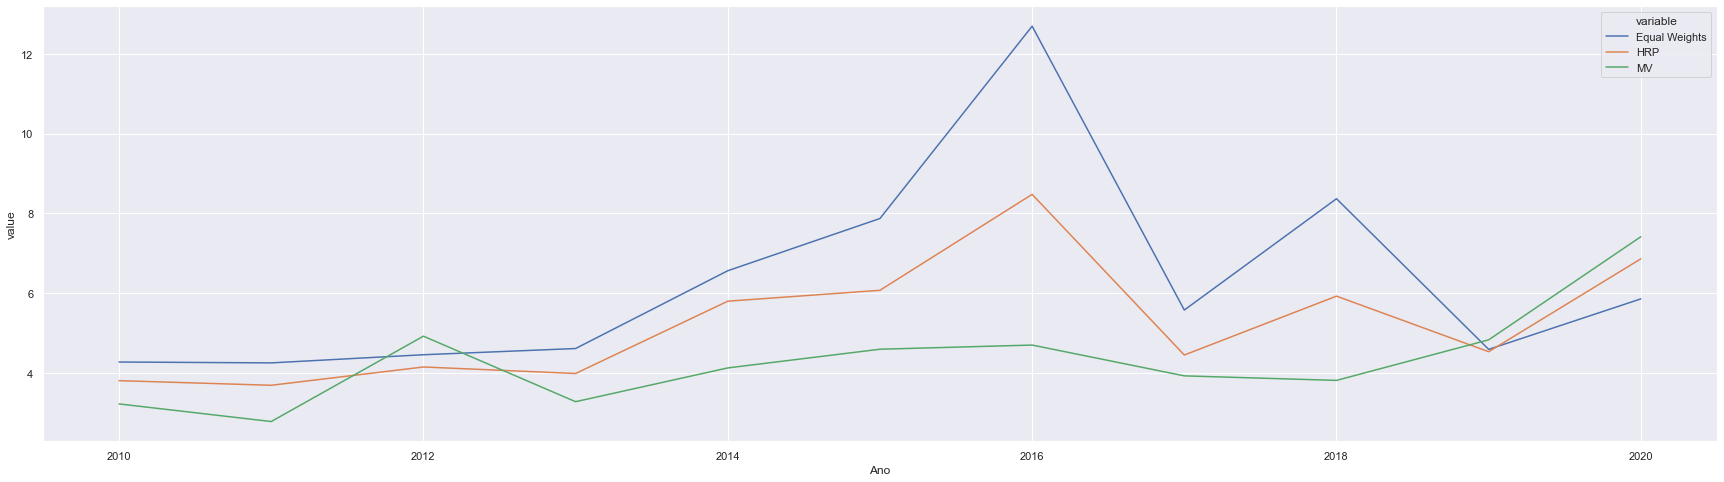

In [154]:
sns.lineplot(x='Ano', y='value', hue='variable', 
             data=pd.melt(df_std_by_year, ['Ano']))


# SR / ASR

In [155]:
def annualized_sharpe(df, col):
  df['excess_returns'] = df[col] - 0.005
  mean_excess_returns = df['excess_returns'].mean()
  std_excess_returns = df['excess_returns'].std()
  sharpe_ratio = mean_excess_returns / std_excess_returns
  annualized_sharpe = math.sqrt(12) * sharpe_ratio

  return annualized_sharpe


In [156]:
sr_df = pd.DataFrame(columns=['Portfolio', 'Annualized Sharpe'])

for col in columns:
  sharpe = annualized_sharpe(df, col)
  row = {'Portfolio': col, 'Annualized Sharpe': sharpe}
  sr_df = sr_df.append(row, ignore_index=True)

sr_df

C:\Users\felip\AppData\Local\Temp\ipykernel_13004\1199886754.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sr_df = sr_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_13004\1199886754.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sr_df = sr_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_13004\1199886754.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sr_df = sr_df.append(row, ignore_index=True)


,Portfolio,Annualized Sharpe
0,Equal Weights,0.580872
1,HRP,0.679508
2,MV,0.779230


# SoR

In [157]:
def annualized_sortino(df, col, mar):
  df['excess_returns'] = df[col] - mar
  mean_excess_returns = df['excess_returns'].mean()
  std_negative_excess_returns = df[df['excess_returns'] < 0]['excess_returns'].std()
  sortino_ratio = mean_excess_returns / std_negative_excess_returns
  annualized_sortino = math.sqrt(12) * sortino_ratio

  return annualized_sortino


In [158]:
sortino_df = pd.DataFrame(columns=['Portfolio', 'Annualized Sortino'])

mar = 0.005
columns = ['Equal Weights', 'HRP', 'MV']

for col in columns:
    sortino = annualized_sortino(df, col, mar)
    row = {'Portfolio': col, 'Annualized Sortino': sortino}
    sortino_df = sortino_df.append(row, ignore_index=True)

sortino_df


C:\Users\felip\AppData\Local\Temp\ipykernel_13004\628608509.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sortino_df = sortino_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_13004\628608509.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sortino_df = sortino_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_13004\628608509.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sortino_df = sortino_df.append(row, ignore_index=True)


,Portfolio,Annualized Sortino
0,Equal Weights,1.070126
1,HRP,1.174826
2,MV,1.366818


# TO

In [159]:
def average_portfolio_turnover(df, col):
  df['weight_diff'] = (df[col] - df[col].shift()).abs()
  avg_turnover = df['weight_diff'].mean()

  return avg_turnover


In [160]:
turnover_df = pd.DataFrame(columns=['Portfolio', 'Average Turnover'])
columns = ['Equal Weights', 'HRP', 'MV']

for col in columns:
    turnover = average_portfolio_turnover(df, col)
    row = {'Portfolio': col, 'Average Turnover': turnover}
    turnover_df = turnover_df.append(row, ignore_index=True)
turnover_df


C:\Users\felip\AppData\Local\Temp\ipykernel_13004\499279984.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  turnover_df = turnover_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_13004\499279984.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  turnover_df = turnover_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_13004\499279984.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  turnover_df = turnover_df.append(row, ignore_index=True)


,Portfolio,Average Turnover
0,Equal Weights,7.077160
1,HRP,5.747076
2,MV,4.820985


# Metrics

In [161]:
metrics = pd.concat([av_df, sd_df['Annualized Standard Deviation'], sr_df['Annualized Sharpe'], sortino_df['Annualized Sortino'], turnover_df['Average Turnover']], axis=1)
metrics
metrics.to_excel("data\metrics_120_months_before_covid.xlsx", index=False)

PermissionError: [Errno 13] Permission denied: 'data\\metrics_120_months_before_covid.xlsx'